<a href="https://colab.research.google.com/github/aahanatiwari/titanic-minorproject/blob/main/Aahana_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!ls

sample_data


In [93]:
train = pd.read_csv('/content/sample_data/train.csv')

In [94]:
test = pd.read_csv('/content/sample_data/test.csv')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train.shape

(891, 12)

In [97]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
test.shape

(418, 11)

In [99]:
submission = pd.read_csv('/content/sample_data/gender_submission.csv')

In [100]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [101]:
submission.shape

(418, 2)

The test data contains all columns except the 'Survived' column, and the submission data contains the 'Survived' column corresponding to passenger IDs.

Merging the datasets on the basis of passender id, we'll get:

In [102]:
merged_data = pd.merge(test, submission, on='PassengerId')
# appending merged data at the end of training data
titanic = pd.concat([train,merged_data], ignore_index=True)

In [103]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 1. Are there any inconsistent or incorrect data entries that need to be corrected or standardized?

In [104]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

There are 263 Age values, 1014 Cabin values, 1 Fare value and 2 Embarked values, that need to be standardized.

<h3> Pre-Processing Step: Dealing with missing (NaN) values.

Since Age is a numeric value, we replace missing values with average of all Age values.

In [105]:
avg = titanic['Age'].mean()

In [106]:
titanic['Age'] = titanic['Age'].fillna(avg)

In [107]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Cabin column contains string values, so we fill missing values as 'Unknown'.

In [108]:
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

Since only 2 values are missing from Embarked column, we replace them with the most frquent one.

In [109]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Here, S is the most frequent value, so we replace the missing values with 'S'

In [110]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [111]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [112]:
avg = titanic['Fare'].mean()
titanic['Fare'] = titanic['Fare'].fillna(avg)

In [113]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Therefore, all missing values have been dealt with.

In [114]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,Unknown,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,Unknown,S


Here, factors like Name, PassengerId and Ticket Number are not relevant factors to determine the likeliness of survival.

In [115]:
titanic = titanic.drop(['Name','PassengerId','Ticket'],axis=1)

In [116]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Unknown,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,Unknown,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29.881138,0,0,8.0500,Unknown,S
1305,1,1,female,39.000000,0,0,108.9000,C105,C
1306,0,3,male,38.500000,0,0,7.2500,Unknown,S
1307,0,3,male,29.881138,0,0,8.0500,Unknown,S


# 2. How can we visualize the survival rate of passengers based on different variables such as age, gender, and socio-economic class?

This can be done using bar plots and hist plots from seaborn library.

In [117]:
import matplotlib.pyplot as plt

In [185]:
titanic['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

Since Sex column has only two distinct values: Male and Female, we'll use a simple bar graph to display survival rate with respect to Sex

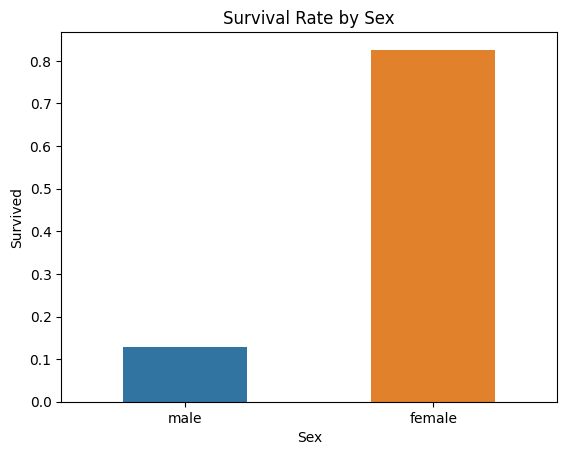

In [ ]:
sns.barplot(x=titanic['Sex'], y=titanic['Survived'], width = 0.5, errorbar=None)
plt.title('Survival Rate by Sex')
plt.show()

<h4> This shows that the survival rate of female passengers was significantly higher than that of male passengers.

In [121]:
titanic['Age'].value_counts()

29.881138    263
24.000000     47
22.000000     43
21.000000     41
30.000000     40
            ... 
23.500000      1
20.500000      1
55.500000      1
66.000000      1
38.500000      1
Name: Age, Length: 99, dtype: int64

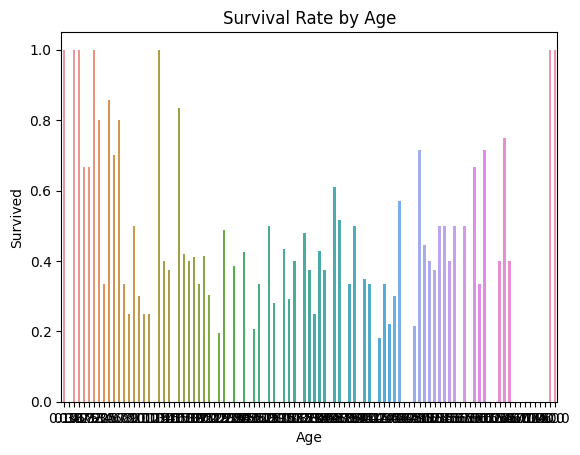

In [ ]:
sns.barplot(x=titanic['Age'], y=titanic['Survived'], errorbar=None, width=0.5)
plt.title('Survival Rate by Age')
plt.show()

Since the Age column has 99 distinct values, the barplot shown is not a tidy representation of rate of survival.
<h4> However, we can conclude that the survival rate for children and elderly was highest.

In [186]:
titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

Since Socio-economic Class has only three distinct values, it can be depicted using a simple bar graph.

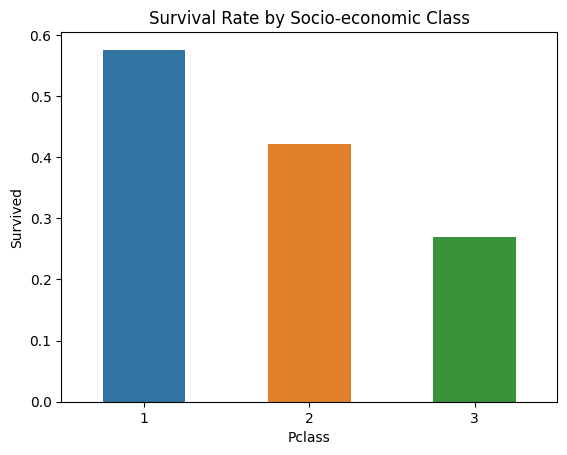

In [ ]:
sns.barplot(x=titanic['Pclass'], y=titanic['Survived'], width=0.5, errorbar=None)
plt.title('Survival Rate by Socio-economic Class')
plt.show()

<h4> From this graph we can conclude that the probability of survival for someone belonging to the First Class was greater than that of the Second Class. Third Class passengers were least likely to survive.

In [134]:
titanic['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

Siblings/Spouses column has limited number of values, so a barplot will be used.

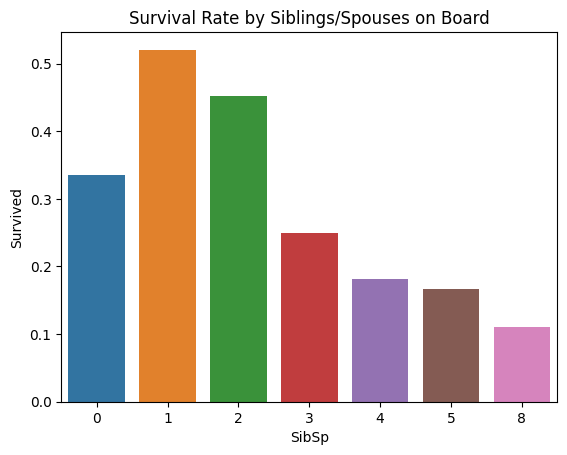

In [ ]:
sns.barplot(x=titanic['SibSp'], y=titanic['Survived'],errorbar=None)
plt.title('Survival Rate by Siblings/Spouses on Board')
plt.show()

<h4> The probability of survival for passengers with fewer siblings or spouses was greater than that of passengers with no siblings or spouses at all.
<h4> Further, the probability of survival decreases with increase in the count of siblings or spouses.

In [136]:
titanic['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

This also has a small number of distinct values, so we'll use barplot.

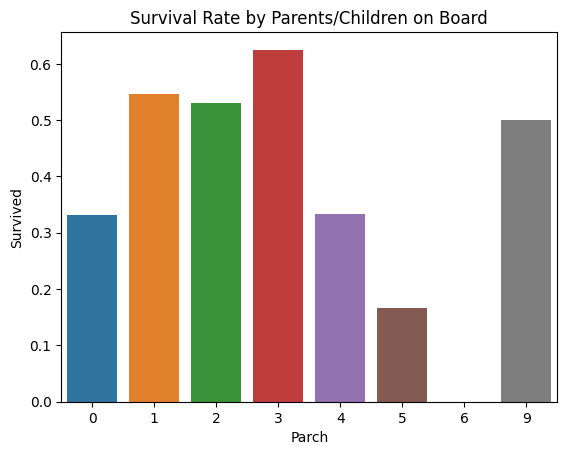

In [ ]:
sns.barplot(x=titanic['Parch'], y=titanic['Survived'], errorbar=None)
plt.title('Survival Rate by Parents/Children on Board')
plt.show()

No certain conclusion can be made from this graph, as no pattern or relationship can be observed between the number of Parents or Children and the probability of survival.

In [147]:
titanic['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
26.2833     1
14.0000     1
15.0000     1
6.2375      1
7.7208      1
Name: Fare, Length: 282, dtype: int64

Since there are 282 distinct Fare values, we'll plot them later using a histogram.

In [ ]:
titanic['Cabin'].value_counts()

n          687
C           59
B           47
D           34
E           32
          ... 
E52          1
D30          1
B58 B60      1
C62 C64      1
C105         1
Name: Cabin, Length: 83, dtype: int64

<p> It is clear that cabin values can be grouped on the basis of the first character.

In [ ]:
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: str(x)[0])

In [ ]:
titanic['Cabin'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

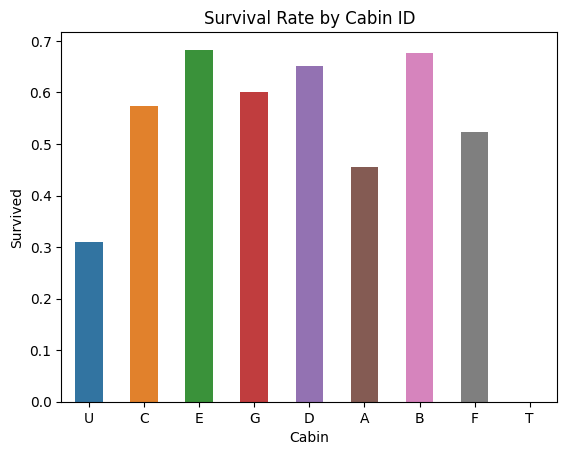

In [223]:
sns.barplot(x=titanic['Cabin'], y=titanic['Survived'], errorbar=None, width=0.5)
plt.title('Survival Rate by Cabin ID')
plt.show()

In [ ]:
titanic['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

There are only 3 different values for where a passenger Embarked. Hence, we'll plot survival rate on the basis of city embarked at using a bar graph.

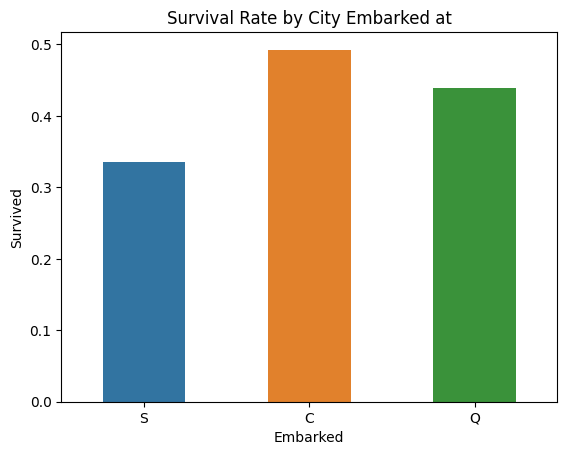

In [ ]:
sns.barplot(x=titanic['Embarked'], y=titanic['Survived'], errorbar=None, width=0.5)
plt.title('Survival Rate by City Embarked at')
plt.show()

<h4> Passengers who embarked at C (Cherbourg) had maximum survival probability.
<h4> Passengers who embarked at S (Southampton) had minimum survival probability.

# 3. Can we create visualizations to understand the relationship between different passenger characteristics (e.g., age, class) and survival?

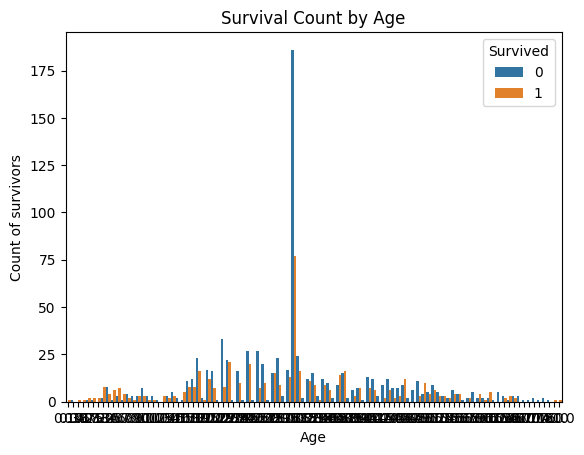

In [208]:
sns.countplot(data=titanic, x='Age', hue='Survived', width=1)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count of survivors')
plt.show()

<h4> Though this countplot is not very helpful in making a conclusion, it is clear that for lower age values, the number of survivors was more than those who didn't make it. Further, for higher age values, the passengers were more likely to survive.
<h4> The maximum number of non-survivors were middle-aged.

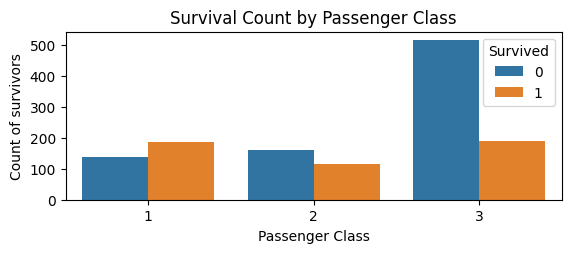

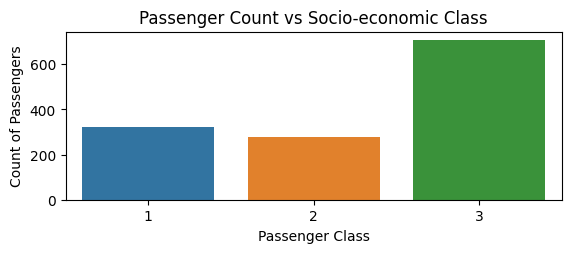

In [213]:
plt.subplot(2,1,1)
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count of survivors')
plt.show()

plt.subplot(2,1,2)
sns.countplot(data=titanic, x='Pclass')
plt.title('Passenger Count vs Socio-economic Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

<h4> More than half the passengers belonging to the 3rd class did not survive.
<h4> More passengers from the 1st class survived, than those who didn't.

<h4> The number of survivors from the first and third classes were nearly the same, even though the total number of passengers from the 3rd class were more than 50% of the number of passengers in the 1st class.

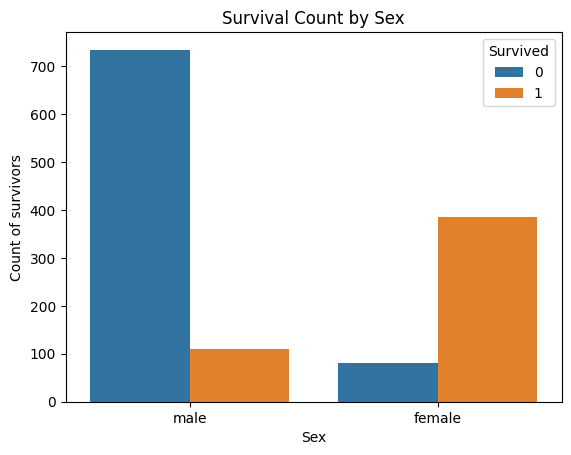

In [ ]:
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of survivors')
plt.show()

<h4> The number of male survivors was close to 10% of the total male passengers.
<h4> In contrast, the number of female survivors was close to 400% of female non-survivors.

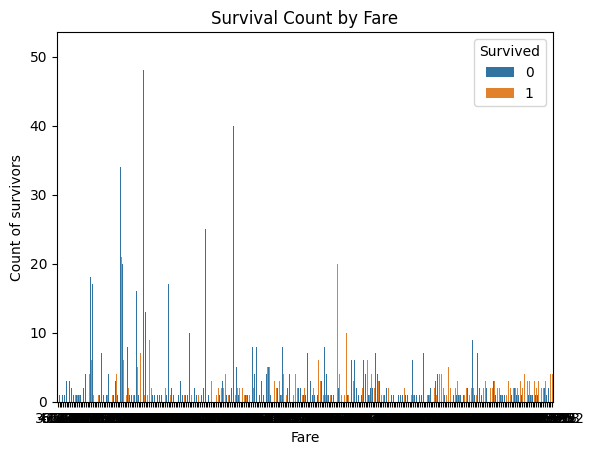

In [211]:
sns.countplot(data=titanic, x='Fare', hue='Survived')
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.ylabel('Count of survivors')
plt.show()

<h4> It is clearly evident from this plot that there were more survivors for passengers with a higher fare.

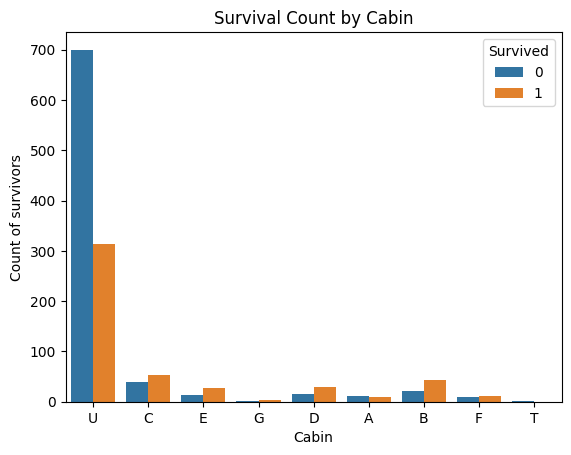

In [222]:
sns.countplot(data=titanic, x='Cabin', hue='Survived')
plt.title('Survival Count by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count of survivors')
plt.show()

<h4> Passengers and non-survivors with cabins belonging to the "U" category were maximum in number.
<h4> Survivors with Cabins not belonging to the "U" category were greater than the number of non-survivors in those categories.

# 4. How can we visualize the distribution of different variables (e.g., age, fare) to identify any patterns or outliers?

<h4> Distribution of features can easily be visualized using the kernel density parameter of a histplot.

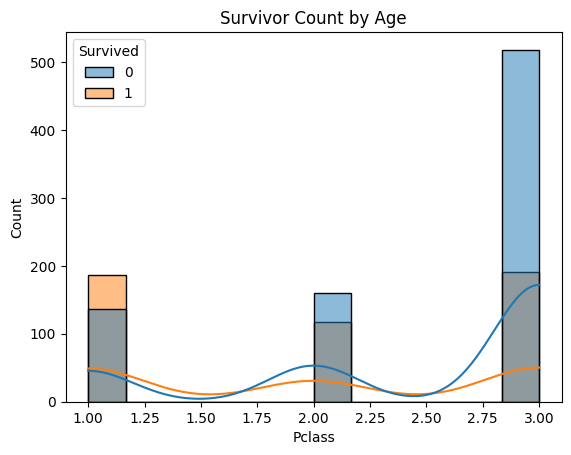

In [238]:
sns.histplot(data=titanic, x='Pclass', hue='Survived', kde=True)
plt.title('Survivor Count by Age')
plt.show()

Here, the number of survivors in the 1st class was more than the people who didn't survive.
The histogram shows that the distribution of survivors was non-uniform.
Passengers belonging to a lower class were more likely not to survive.

<h4> We can conclude that higher the social class, higher was the number of survivors.

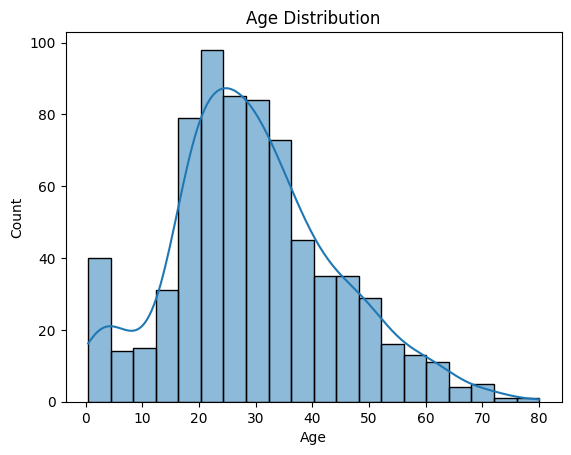

In [225]:
sns.histplot(data=train, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

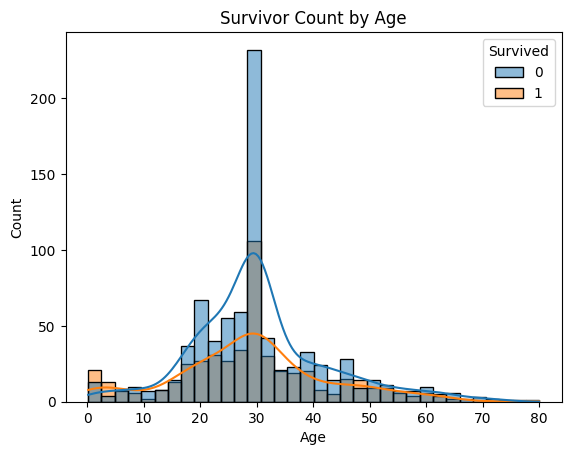

In [237]:
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True)
plt.title('Survivor Count by Age')
plt.show()

From this we can conclude that the number of survivors was maximum for passengers around the ages of 20-30 years. However, the number of non-survivors was also maximum for the same age group, and much greater than the number of survivors.
The survivors between the ages of 0-6 years were more than those who didn't survive.
<h4> We can conclude that the number of children who survived were more than the number of children who didn't survive. Hence, children were prioritized over other passengers.

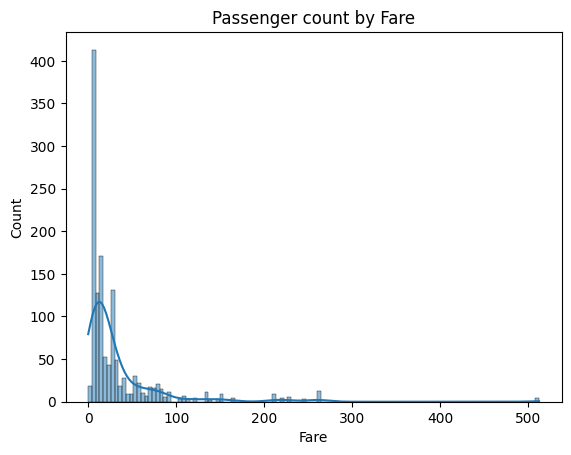

In [203]:
sns.histplot(data=titanic, x='Fare', kde=True)
plt.title('Passenger count by Fare')
plt.show()

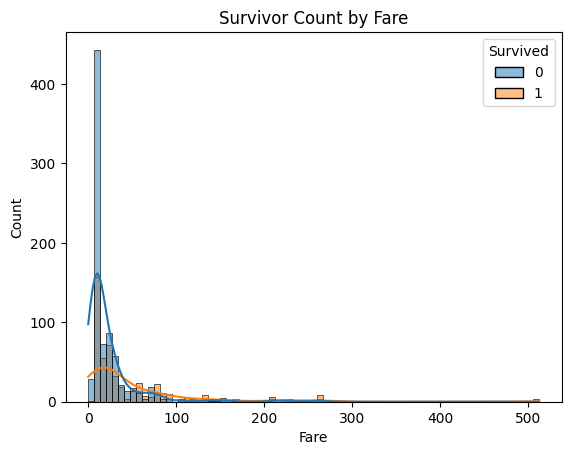

In [235]:
max_fare = titanic['Fare'].max()
sns.histplot(data=titanic, x='Fare', hue='Survived', kde=True, bins=75)
plt.title('Survivor Count by Fare')
plt.show()

Breaking the graph into two parts for more detailed visualization:

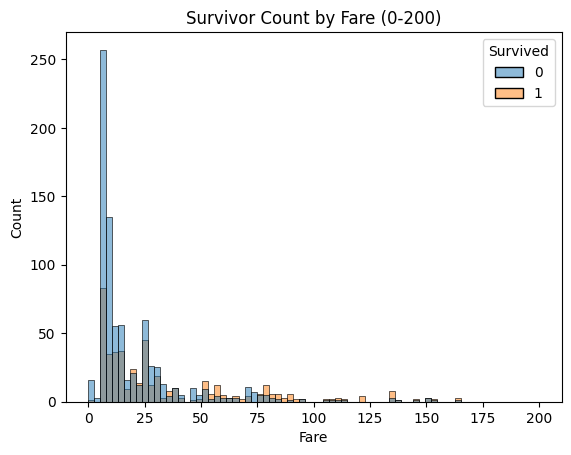

In [234]:
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=75, binrange=(0,200))
plt.title('Survivor Count by Fare (0-200)')
plt.show()

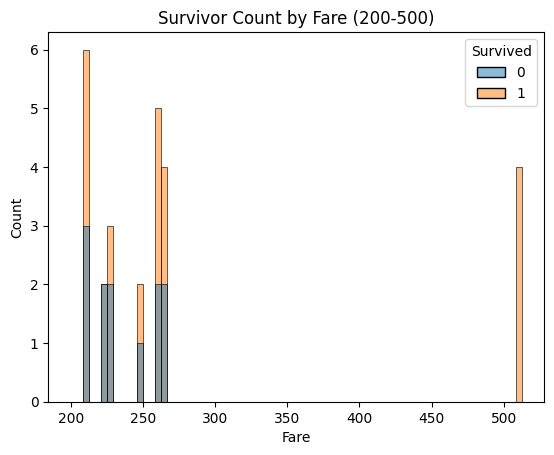

In [233]:
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=75, binrange=(200,max_fare))
plt.title('Survivor Count by Fare (200-500)')
plt.show()

<h4> We can conclude that higher the fare, higher the probability of survival.
<h4> Passengers with a lower fare were least likely to survive, while all those who had the highest fare survived.

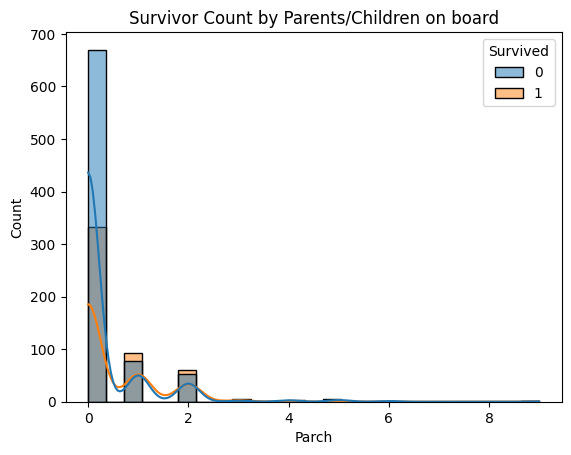

In [240]:
sns.histplot(data=titanic, x='Parch', hue='Survived', bins=25, kde=True)
plt.title('Survivor Count by Parents/Children on board')
plt.show()

<h4> We can conclude that small families were more likely to survive.
<h4> Majority of those with no family on board, didn't survive.

# 5. Can we visualize the distribution of survivors and non-survivors based on different variables to gain insights into the factors that influenced survival?

Performing encoding to convert categorical values to int or float for easier comparison.

In [254]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [255]:
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

Normalizing numerical features

In [256]:
scaler = StandardScaler()
titanic[['Age','Fare']] = scaler.fit_transform(titanic[['Age','Fare']])

In [257]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.611972,1,0,-0.503595,U,2
1,1,1,0,0.630431,1,0,0.734503,C,0
2,1,3,0,-0.301371,0,0,-0.490544,U,2
3,1,1,0,0.397481,1,0,0.382925,C,2
4,0,3,1,0.397481,0,0,-0.488127,U,2
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,0.000000,0,0,-0.488127,U,2
1305,1,1,0,0.708081,0,0,1.461829,C,0
1306,0,3,1,0.669256,0,0,-0.503595,U,2
1307,0,3,1,0.000000,0,0,-0.488127,U,2


In [258]:
titanic['Cabin'] = label_encoder.fit_transform(titanic['Cabin'])
titanic[['Cabin']] = scaler.fit_transform(titanic[['Cabin']])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.611972,1,0,-0.503595,0.517788,2
1,1,1,0,0.630431,1,0,0.734503,-1.927616,0
2,1,3,0,-0.301371,0,0,-0.490544,0.517788,2
3,1,1,0,0.397481,1,0,0.382925,-1.927616,2
4,0,3,1,0.397481,0,0,-0.488127,0.517788,2
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,0.000000,0,0,-0.488127,0.517788,2
1305,1,1,0,0.708081,0,0,1.461829,-1.927616,0
1306,0,3,1,0.669256,0,0,-0.503595,0.517788,2
1307,0,3,1,0.000000,0,0,-0.488127,0.517788,2


In [259]:
import seaborn as sns

<Axes: >

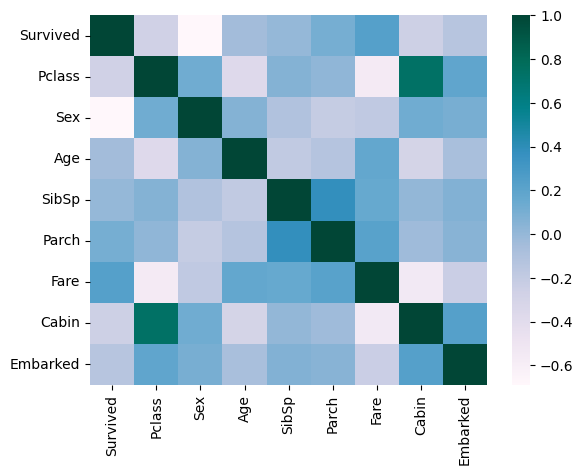

In [260]:
sns.heatmap(titanic.corr(numeric_only=True),cmap="PuBuGn")

<h4> This heatmap shows that features like Age and Siblings on board are not essential in determining the number of survivors.

In [261]:
titanic = titanic.drop(['Age','SibSp'],axis=1)

<h4>
<h4> From the heatmap, we can also conclude that Fare and Survivors has a linear relationship.


<h4> However, Passenger Class, Sex, Cabin Number and city Embarked at, have a negative dependency on the number of Survivors, that is, as these values increase, the survival chances decrease.

# Logistic Regression to determine if a person survived or not

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [279]:
model = LogisticRegression()

In [280]:
X = titanic.drop(['Survived'], axis=1)

In [281]:
Y = titanic['Survived']

Splitting the dataframe into training and test data.

In [282]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [283]:
model.fit(x_train, y_train)

LogisticRegression()

In [284]:
model.intercept_

array([3.29332089])

In [285]:
model.coef_

array([[-0.65131071, -3.52108578, -0.12430103,  0.01635389, -0.16106316,
        -0.13281839]])

In [306]:
y_test = model.predict(x_test)

In [307]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [287]:
model.score(x_train, y_train)

0.8529130850047756

In [288]:
model.score(x_test, y_test)

0.8587786259541985

<h3> Since both training and test data have nearly 85% score, we can infer that the logistic regression model will be accurate for this dataset.

<h2> In conclusion:
<h2> I used the Logistic Regression algorithm for Machine Learning to analyze the famous Titanic dataset and predicted if a passenger on the titanic survived or not, with 85.87% accuracy.